# WEEK 12 (15/01/18)

# Done
* Sent $\epsilon$ derivation to Tim $\checkmark$
* Redefined levels $\checkmark$
* Added surface area of each location to data so that we can change $\gamma$ according to it $\checkmark$
* Wrote functions to calculate total area of clusters $\checkmark$
* Partially rewrote the epsilon function (so that it gives the difference between the level 0 flow and the clustered flow at whatever level we want) and deleted unused ODM functions

### To Do
* Think about $\gamma$ parameter at different scales for the gravity model
* Analyse individual locations and plot $\epsilon$ to see pattern
* Define typical length scale for distance as previously done so we can compare the plots
* Derivation of epsilon with different masses
* Rewrite eps_scale in object-oriented style


### Questions
* <font color='green'> Is it better to cluster each level starting from the previous one OR from the original unclustered locations and incrementing the distance? $\rightarrow$ This will depend on our definition of clustering levels </font> (See Section 2)


## 1. Definition of Levels

We came to the conclusion that we should define the levels starting from the original distribution and increasing the distance each time, so there's no mismatch between our PW-centroids and the centroids as found by the algorithm we're using. 

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from hm.analysis.scaling import eps_scale
from hm.coarse_grain import clustering
from hm.analysis.scaling.pop_tools import make_pop
from matplotlib import pyplot as plt
import pandas
import seaborn as sns; sns.set()

In [6]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/LSOA populations and areas 2011 (merged).csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [9]:
d_max = [300, 500, 700, 1000, 1300]
gamma = 2

Now we can actually see the difference between the PW-centroids and the centroids after a few levels of clustering (as attempted in Week 11):

In [ ]:
clusters = eps_scale.iterate(lon_df, d_max)[1]
plt.plot(clusters.pw_centroids()[0], clusters.pw_centroids()[1], '.')
clusters.viz_clusters()
plt.title("PW Centroids")

clusters = eps_scale.iterate(lon_df, d_max)[1]
plt.plot(clusters.centroids()[0], clusters.centroids()[1], '.')
clusters.viz_clusters()
plt.title("Centroids")

Well, we can't actually see it, but printing out the coordinates we can check they're not the same.

## 2. Error function $\epsilon$: what happens with the clusters?

In weeks 3-9 we have analysed the error function $$\epsilon = \frac{T_{ib} - (T_{ij} + T_{ik})}{T_{ib}}$$ resulting from agglomerating 2 locations at random and comparing the flow between the 3 isolated locations and the 2 blocks of locations (single target + 2 clustered). For this, we simply used a random uniform distribution of locations over a 1x1 square lattice, each with uniform population distribution ($m_i = 1 \forall i$).

Now we want to see whether our observations are still valid in the complex case of a more realistic distribution of locations (this time we're using real data, so no mathematical function for $\rho(x)$) over an arbitrary area and with a non-uniform population distribution.

We need to find a way to **reduce our matrix of $\epsilon_{ij}$ values** (parametrise?) so that we can study the pattern that these values follow in relation to our variables.

We can identify **3 different variables**: 
1. the mass of a cluster $M$
2. the size of a cluster $L$
3. the distance between clusters $r$

### 2.1 $\epsilon$ for individual clusters

First, let's look at single values of $\epsilon$ as a function of the inter-location (cluster) distance instead of the whole matrix.

#### 2.1.1 Level 1

In [12]:
levels = eps_scale.iterate(lon_df, d_max)
level_1 = levels[0]
level_2 = levels[1]
level_3 = levels[2]
level_4 = levels[3]
level_5 = levels[4]

In [ ]:
eps_level_1 = eps_scale.epsilon(levels, 1, gamma, lon_df)

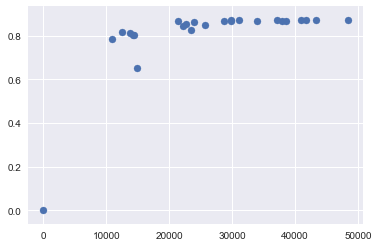

In [56]:
x = eps_scale.cluster_population(level_1).DM[10][1:] #distance of location 20 with all the others
y = eps_level_1[10][1:]
plt.scatter(x, y)
plt.show()